In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import Normalize
import seaborn as sns
from pathlib import Path

---
Files
---

In [3]:
def clear_files():
    folder = Path('./results/')
    for f in folder.rglob('*'):
        f.unlink()

In [4]:
clear_files()

---
Graphs
---

In [5]:
timesteps = pd.read_csv('./results/timesteps.txt', header=None)
n = len(timesteps)
timesteps

0
0   0.012536
1   0.127648
2   0.234092
3   0.301551
4   0.392548
5   0.473561
6   0.556521
7   0.636830
8   0.709094
9   0.780494
10  0.816678

Total mass

0.0125356 2.4e-05 0.000518 3.0
0.127648 2.4999999999999998e-05 0.000709 3.0000000000000004
0.234092 1e-06 0.000771 2.9999999999999996
0.301551 0.0 0.0007030000000000001 3.0
0.392548 9e-06 0.000651 3.0
0.473561 8e-06 0.000625 3.0
0.556521 2e-06 0.0007279999999999999 3.0
0.63683 0.0 0.000642 3.0
0.709094 0.0 0.000669 3.0
0.780494 0.0 0.000635 3.0
0.816678 0.0 0.00066 3.0


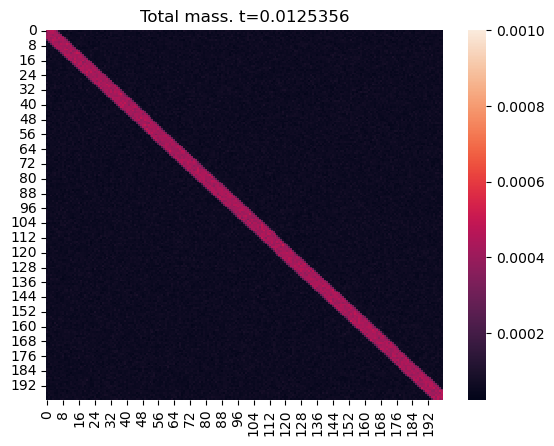

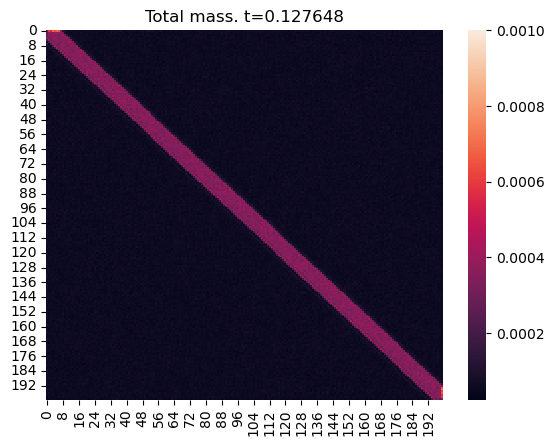

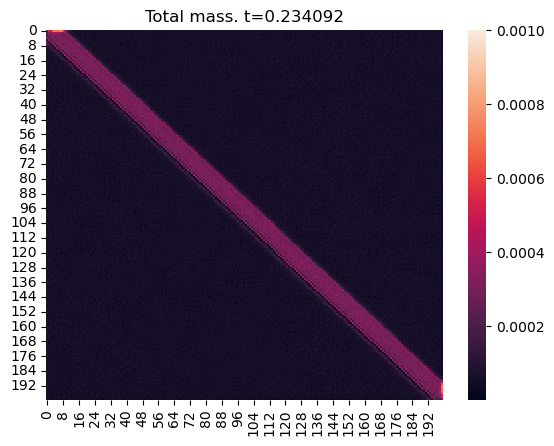

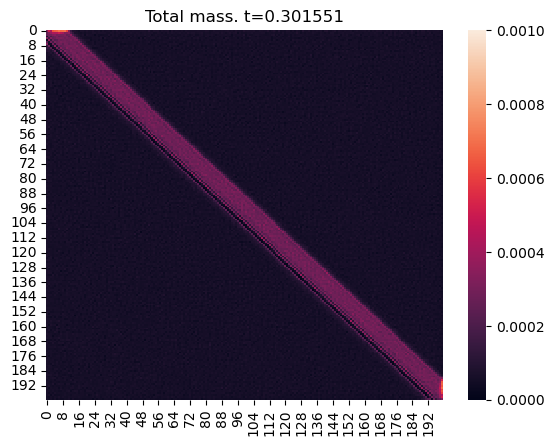

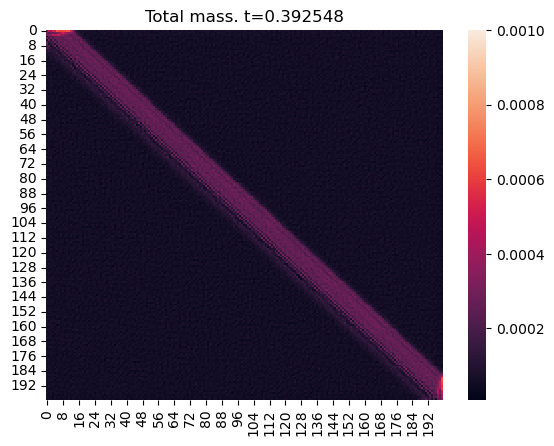

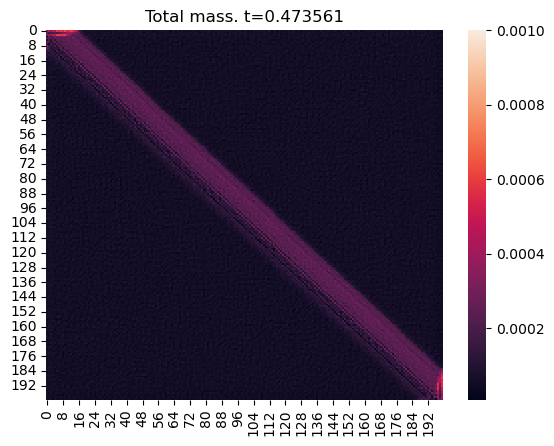

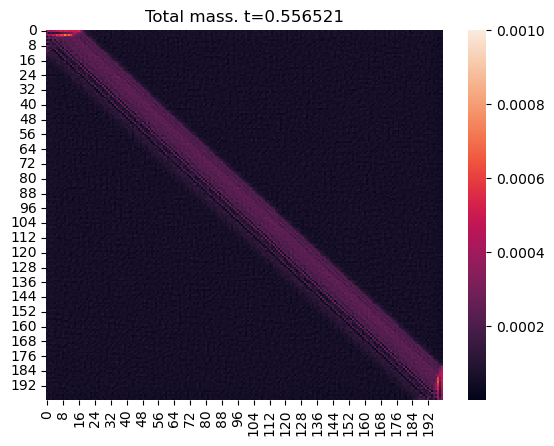

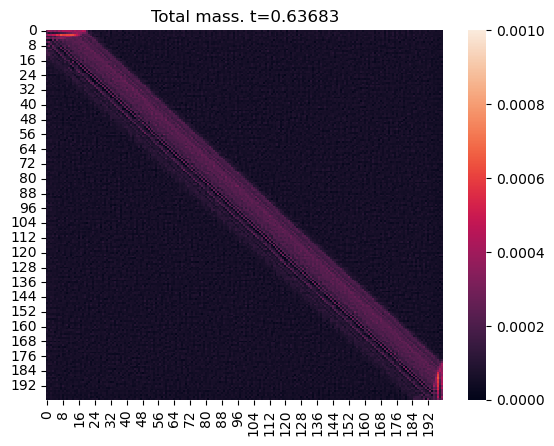

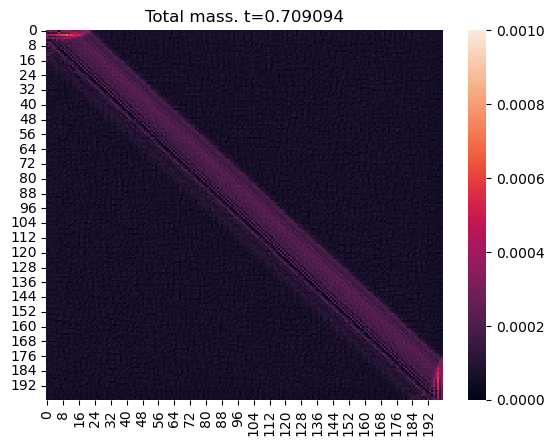

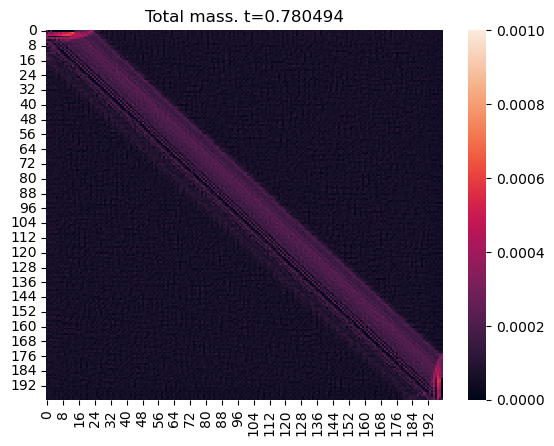

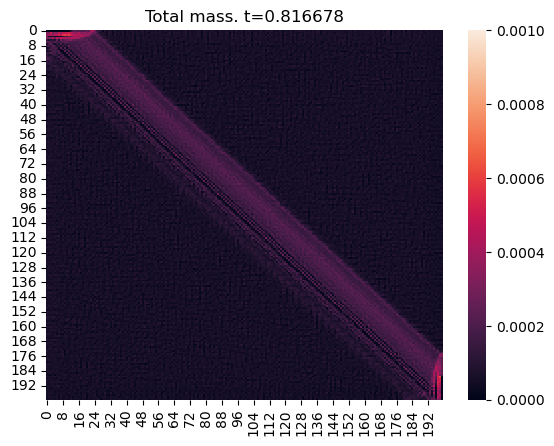

In [6]:
for i in range(n):
    mass_a = np.loadtxt(f'./results/mass_a{i}.txt', delimiter=',')
    mass_b = np.loadtxt(f'./results/mass_b{i}.txt', delimiter=',')
    fig, ax = plt.subplots()
    sns.heatmap((mass_a + mass_b), ax=ax, vmax=0.001)
    ax.set_title(f'Total mass. t={timesteps.loc[i][0]}')
    print(timesteps.loc[i][0], (mass_a+mass_b).min(), (mass_a+mass_b).max(), (mass_a+mass_b).sum())

Pressure

0.0125356 0.00119323 0.0255809
0.127648 0.000961224 0.0439853
0.234092 8.90718e-05 0.0581324
0.301551 0.0 0.0621936
0.392548 2.18451e-05 0.0685292
0.473561 0.0 0.064712
0.556521 0.0 0.0748227
0.63683 0.0 0.0636371
0.709094 0.0 0.0710155
0.780494 0.0 0.0656627
0.816678 0.0 0.0651982


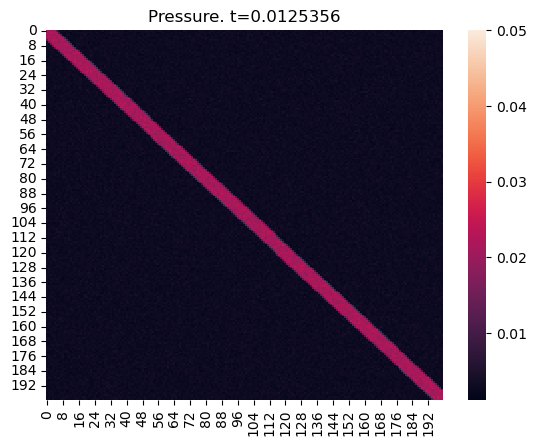

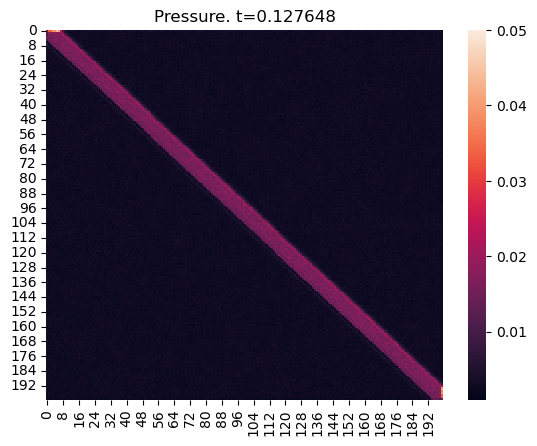

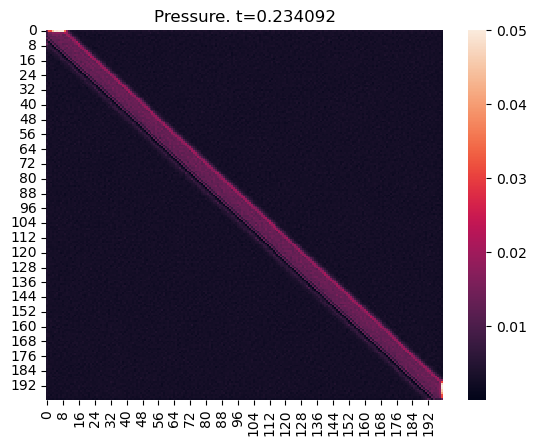

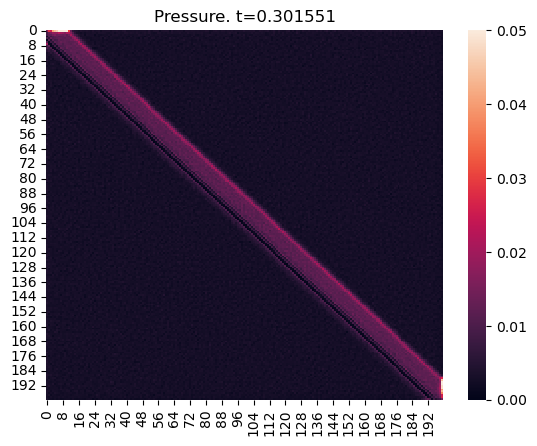

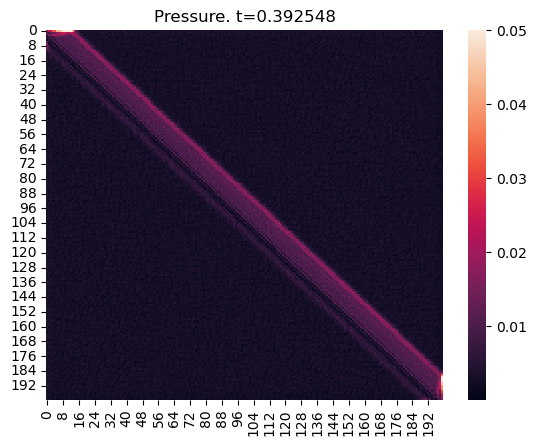

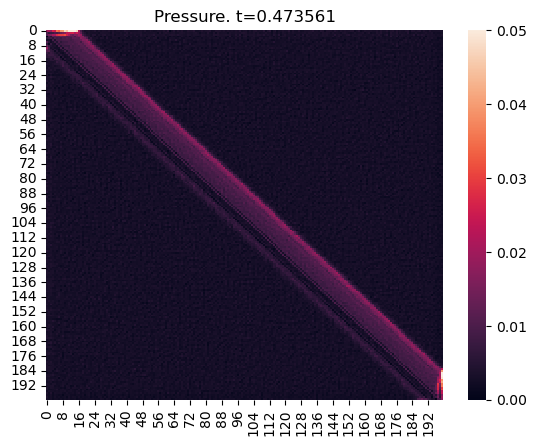

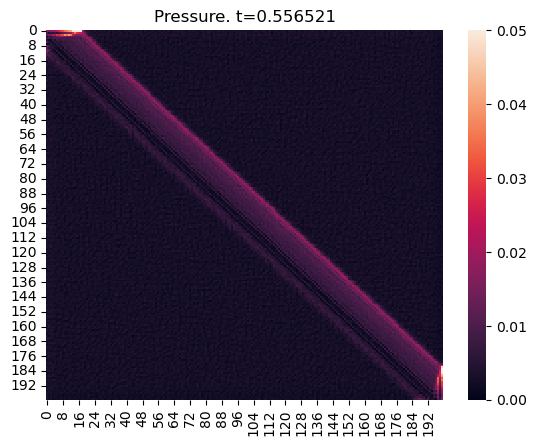

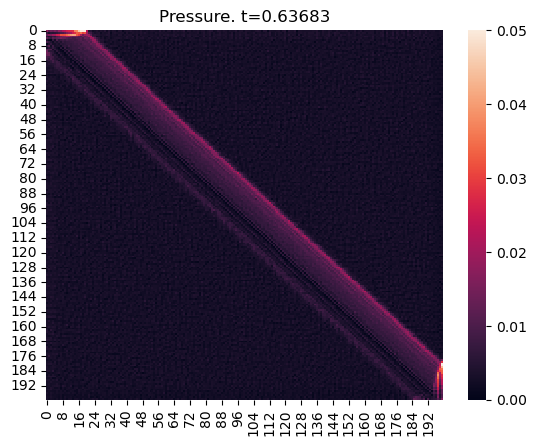

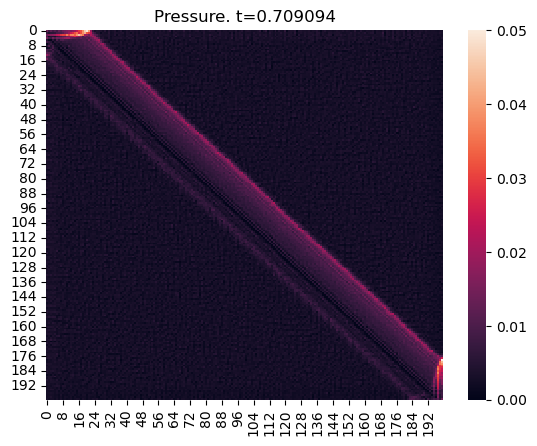

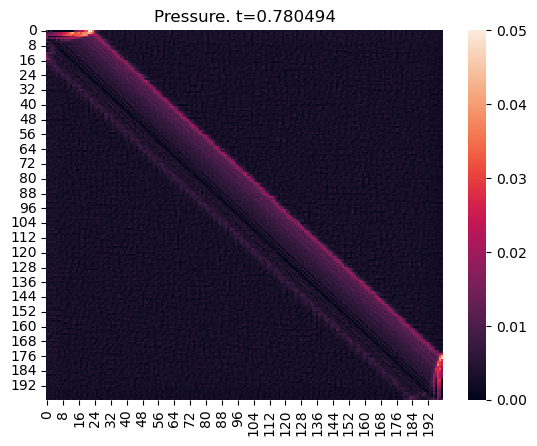

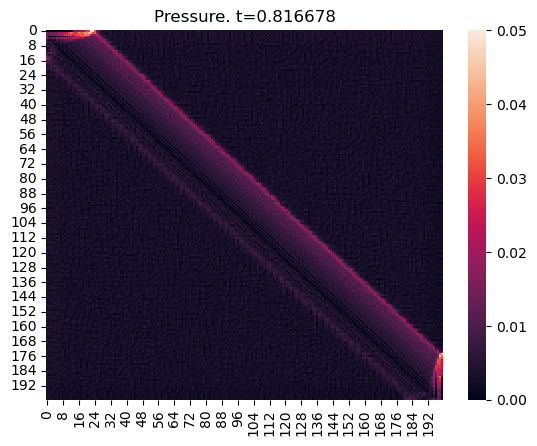

In [7]:
for i in range(n):
    pressure = np.loadtxt(f'./results/pressure{i}.txt', delimiter=',')
    fig, ax = plt.subplots()
    sns.heatmap((pressure), ax=ax, vmax=0.05)
    ax.set_title(f'Pressure. t={timesteps.loc[i][0]}')
    print(timesteps.loc[i][0], pressure.min(), pressure.max())

Inner energy A

0.0125356 0.976647 1.34028
0.127648 0.696332 1.75353
0.234092 -0.0545401 2.08022
0.301551 -0.441796 2.76218
0.392548 -0.232741 2.50241
0.473561 -0.067602 2.86491
0.556521 0.0 2.97093
0.63683 -0.174633 2.95574
0.709094 -0.717657 3.03145
0.780494 -20.9966 3.20105
0.816678 -0.242768 3.20374


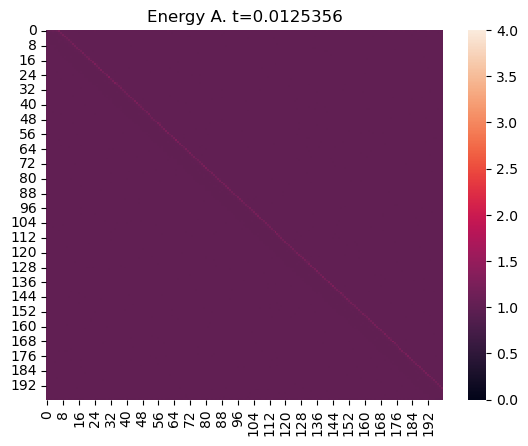

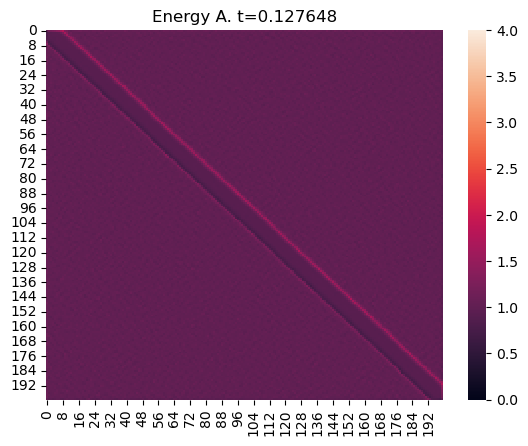

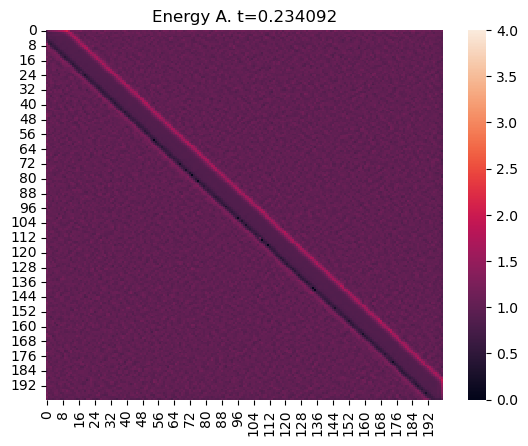

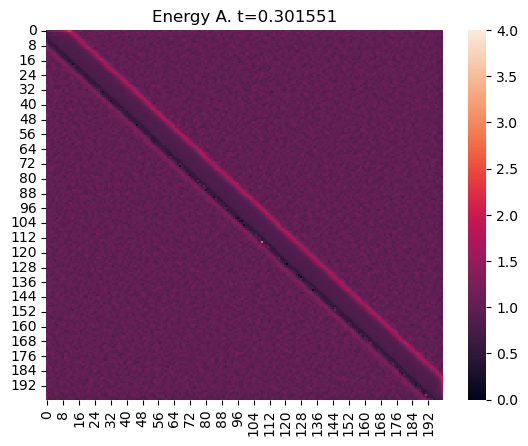

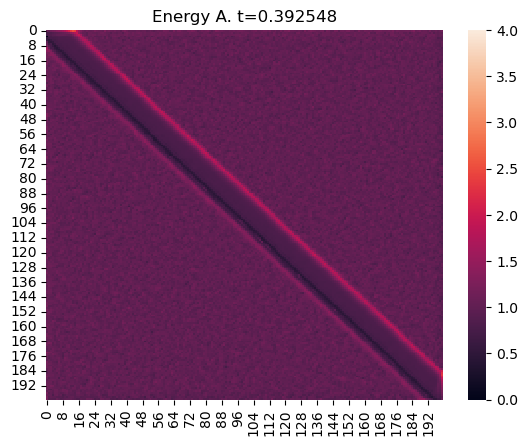

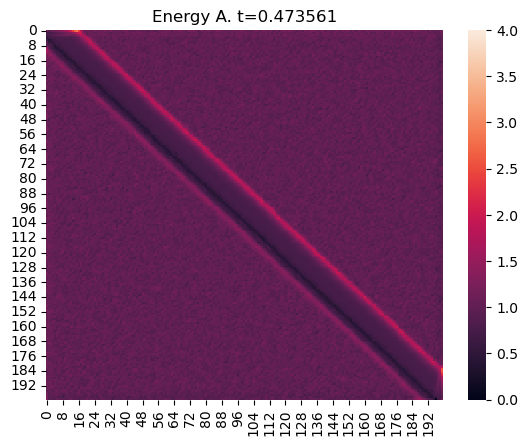

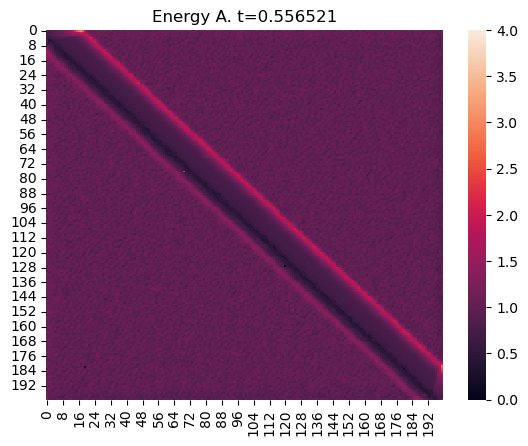

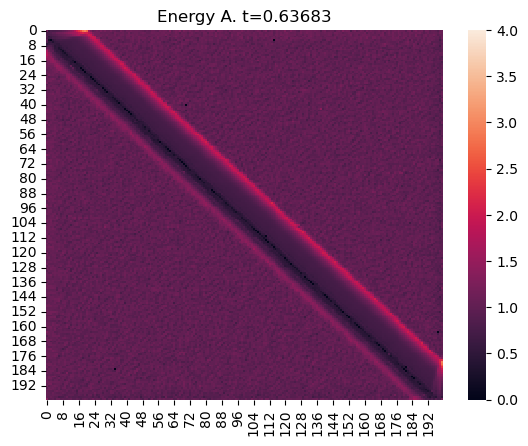

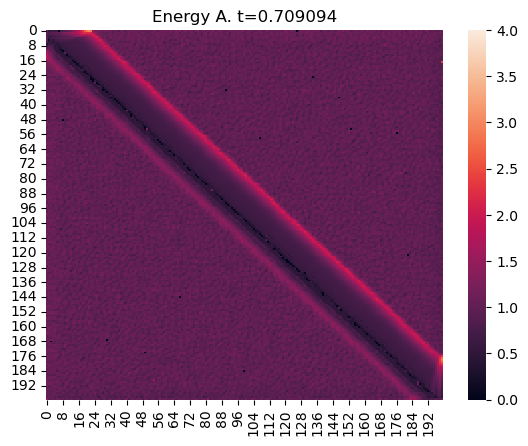

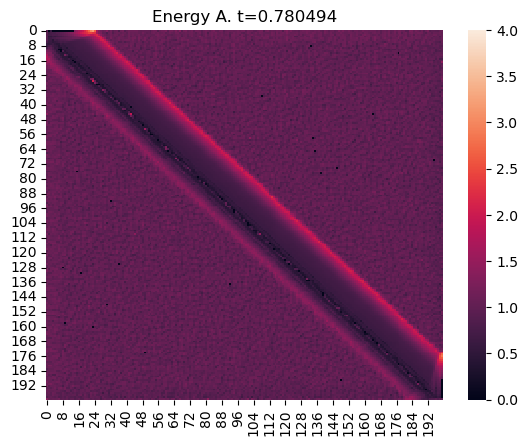

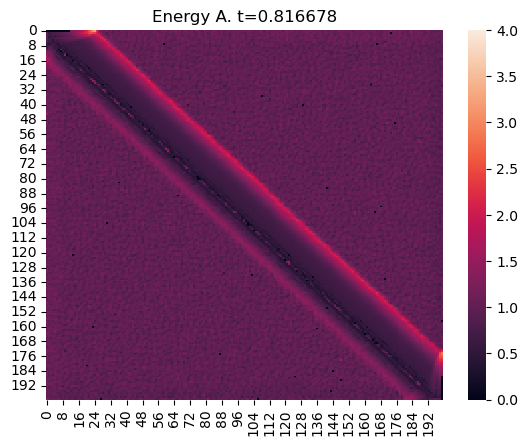

In [8]:
for i in range(n):
    nrj_a = np.loadtxt(f'./results/energy_a{i}.txt', delimiter=',')
    fig, ax = plt.subplots()
    sns.heatmap((nrj_a), ax=ax, vmin=0, vmax=4)
    ax.set_title(f'Energy A. t={timesteps.loc[i][0]}')
    print(timesteps.loc[i][0], nrj_a.min(), nrj_a.max())

Energy W

0.0125356 0.00243202 0.0806298 324.97667772000005
0.127648 0.00263133 0.125317 324.97667728
0.234092 0.000395666 0.154942 324.97667724999997


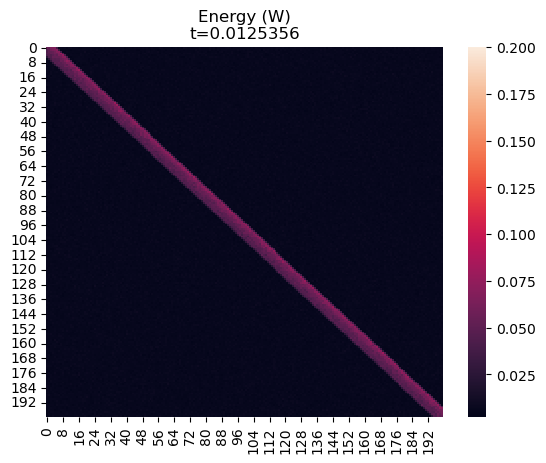

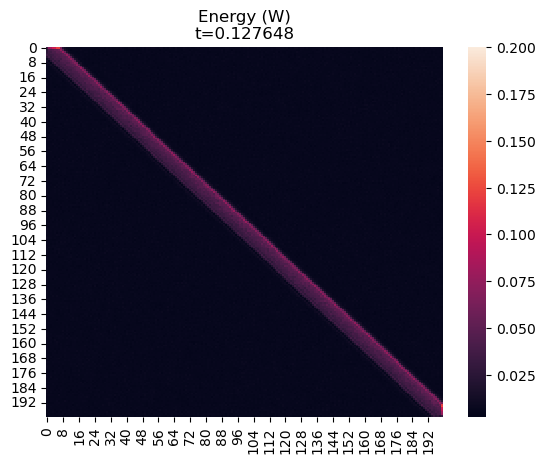

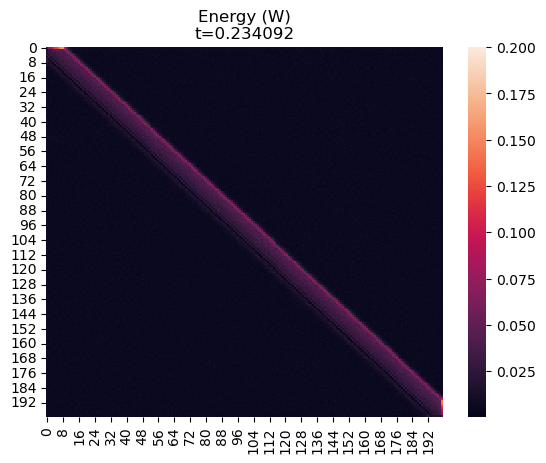

In [9]:
for i in range(3):
    w = np.loadtxt(f'./results/energy{i}.txt', delimiter=',')
    fig, ax = plt.subplots()
    sns.heatmap((w), ax=ax, vmax=0.20)
    ax.set_title(f'Energy (W)\nt={timesteps.loc[i][0]}')
    print(timesteps.loc[i][0], w.min(), w.max(), w.sum())

Vx

In [10]:
# for i in range(n):
#     vx = np.loadtxt(f'./results/vx{i}.txt', delimiter=',')
#     fig, ax = plt.subplots()
#     sns.heatmap((vx), ax=ax, vmin=-3.0, vmax=3.0)
#     ax.set_title(f'VX. t={timesteps.loc[i][0]}')
#     print(timesteps.loc[i][0], vx.min(), vx.max())

Vx_tilda

In [11]:
# for i in range(n):
#     vx_tilda = np.loadtxt(f'./results/vx_tilda{i}.txt', delimiter=',')
#     fig, ax = plt.subplots()
#     sns.heatmap((vx_tilda), ax=ax, vmin=-3.0, vmax=3.0)
#     ax.set_title(f'Vx_tilda. t={timesteps.loc[i][0]}')
#     print(timesteps.loc[i][0], vx_tilda.min(), vx_tilda.max())

Vy

In [12]:
# for i in range(n):
#     vy = np.loadtxt(f'./results/vy{i}.txt', delimiter=',')
#     fig, ax = plt.subplots()
#     sns.heatmap((vy), ax=ax, vmin=-3.0, vmax=3.0)
#     ax.set_title(f'VY. t={timesteps.loc[i][0]}')
#     print(timesteps.loc[i][0], vy.min(), vy.max())

---
Creating animation
---

In [13]:
import os
import imageio

### Total mass


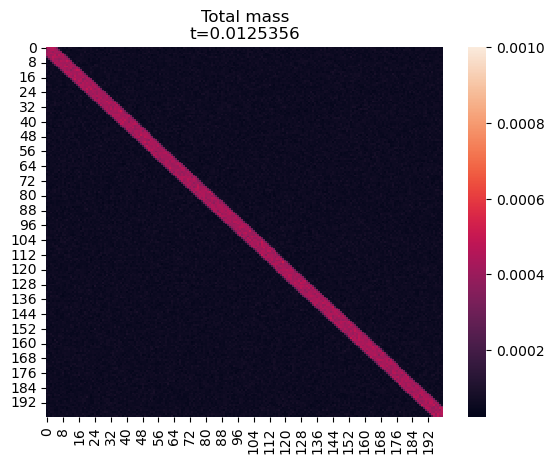

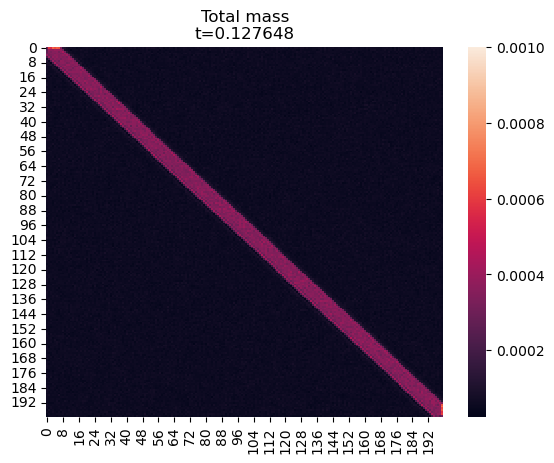

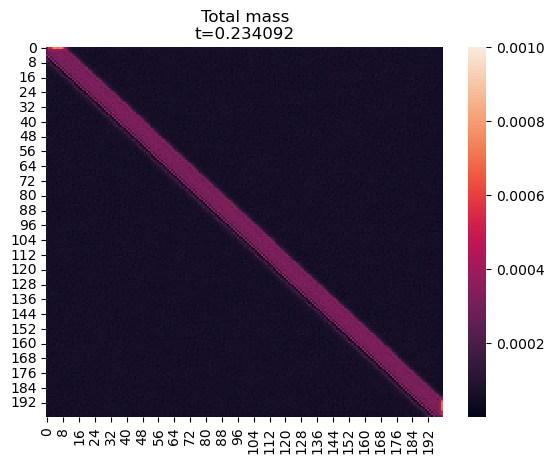

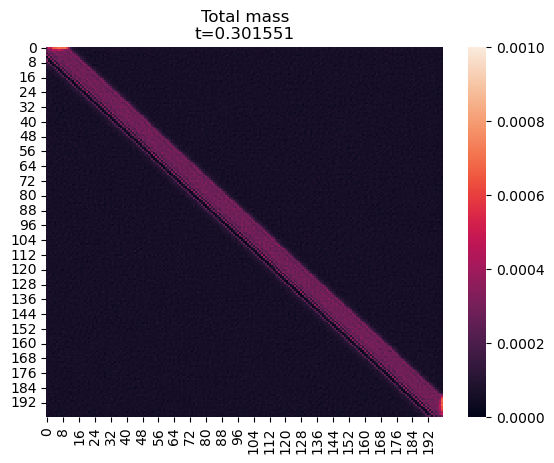

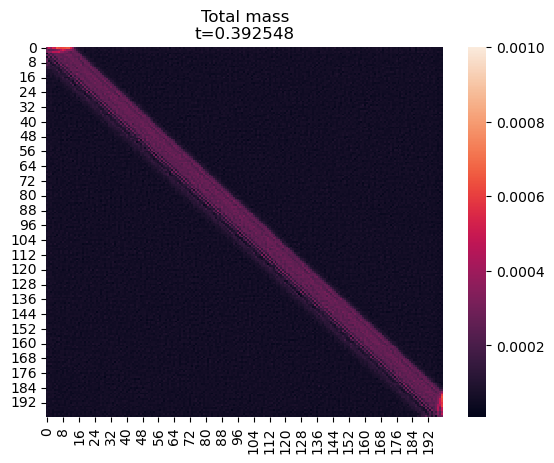

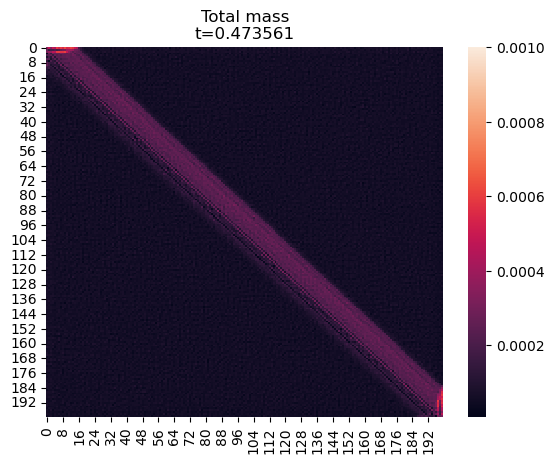

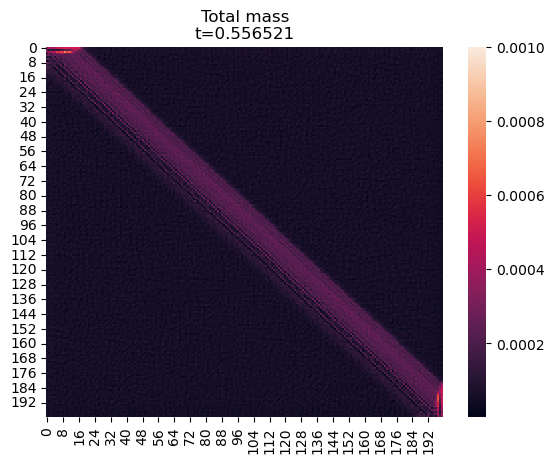

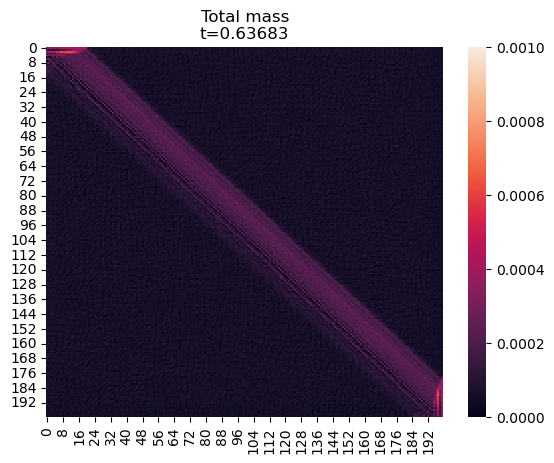

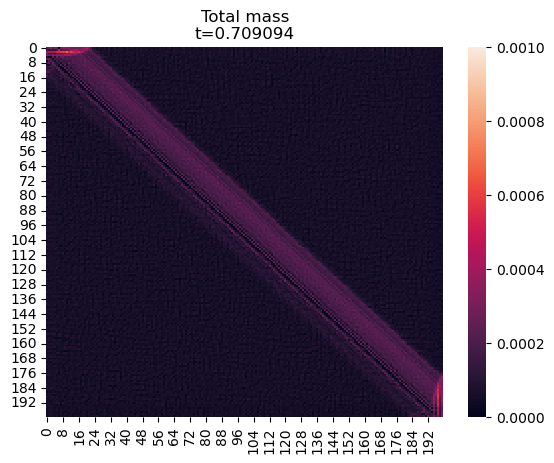

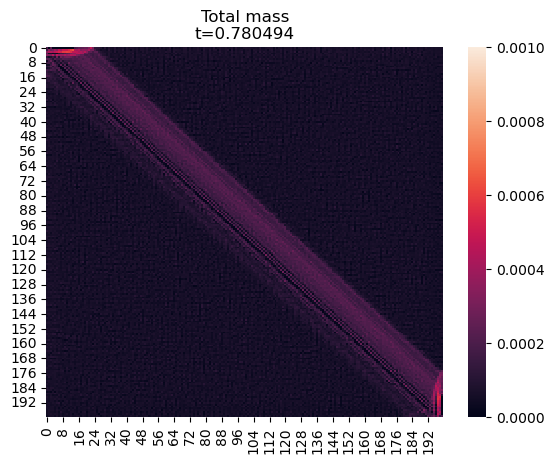

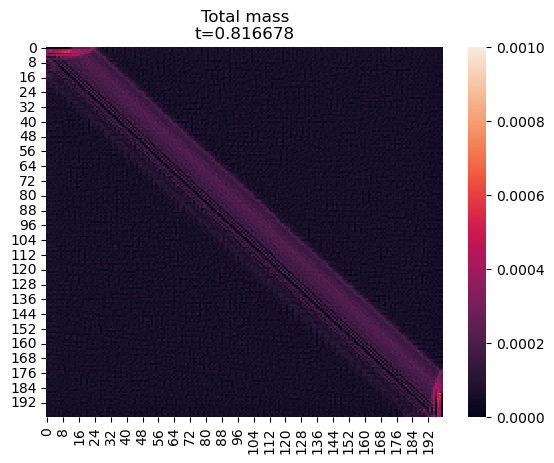

In [14]:
for i in range(n):
    mass_a = np.loadtxt(f'./results/mass_a{i}.txt', delimiter=',')
    mass_b = np.loadtxt(f'./results/mass_b{i}.txt', delimiter=',')
    fig, ax = plt.subplots()
    sns.heatmap((mass_a + mass_b), ax=ax, vmax=0.001)
    ax.set_title(f'Total mass\nt={timesteps.loc[i][0]}')
    plt.savefig(f'./graphics/mass_evolution_{i}.png')

In [15]:
image_dir = './graphics/'
images = list()
for i in range(n):
    file_name = f'mass_evolution_{i}.png'
    file_path = os.path.join(image_dir, file_name)
    images.append(imageio.imread(file_path))

# Make it pause at the end so that the viewers can ponder
for _ in range(3):
    images.append(imageio.imread(file_path))

imageio.mimsave('./animations/mass_evolution.gif', images)

/tmp/ipykernel_10644/912547216.py:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(file_path))
/tmp/ipykernel_10644/912547216.py:10: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(file_path))


### Energy W

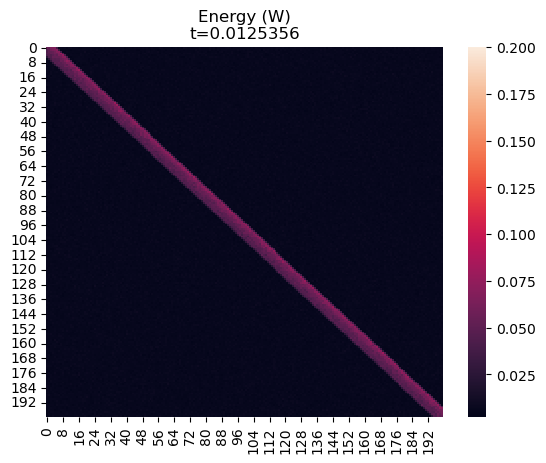

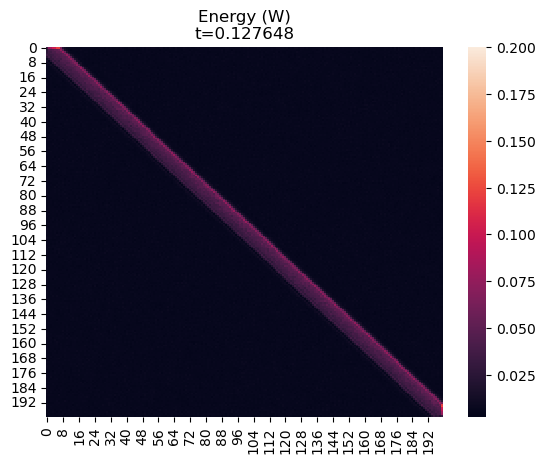

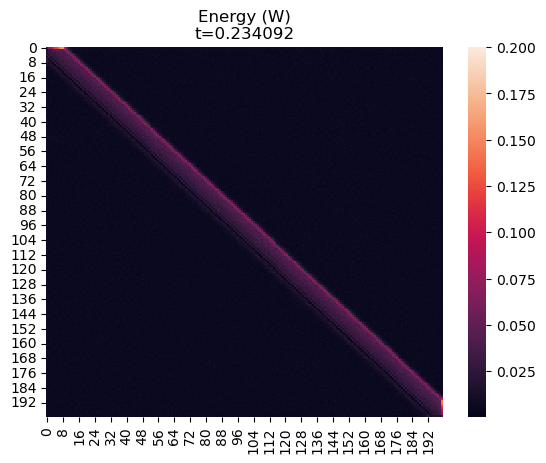

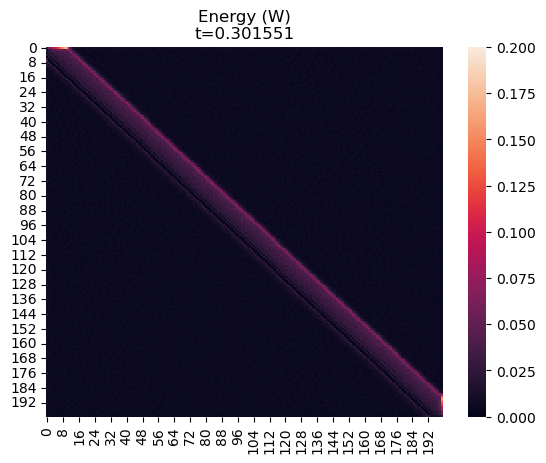

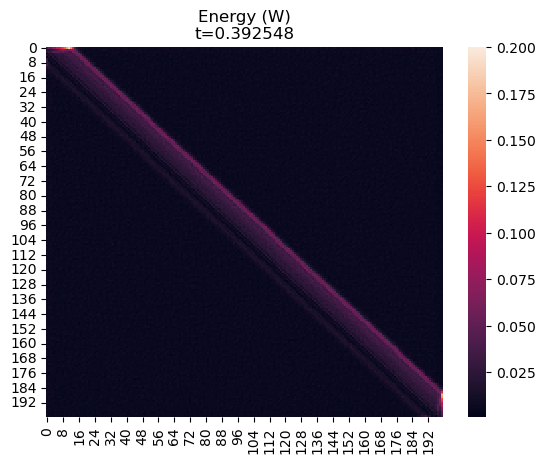

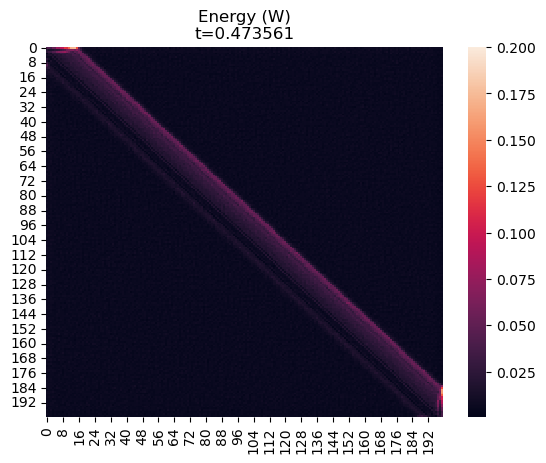

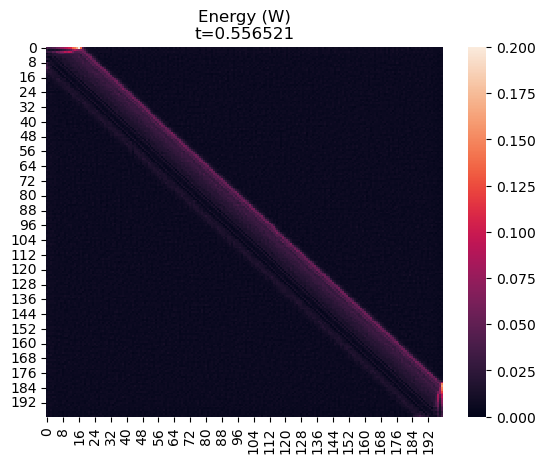

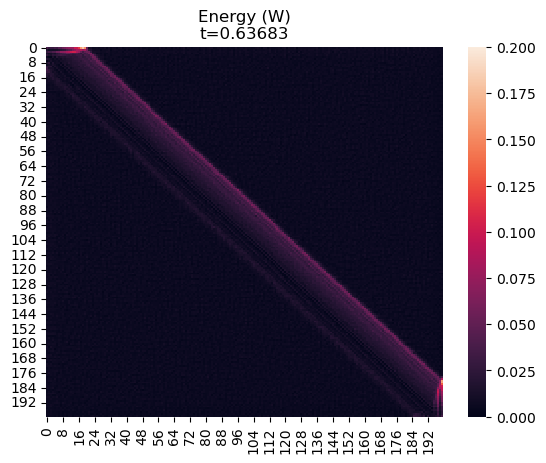

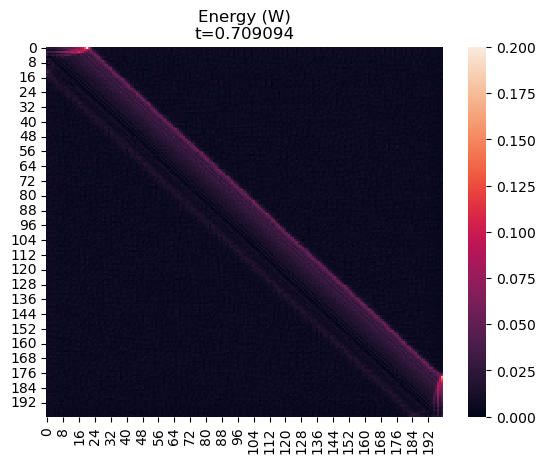

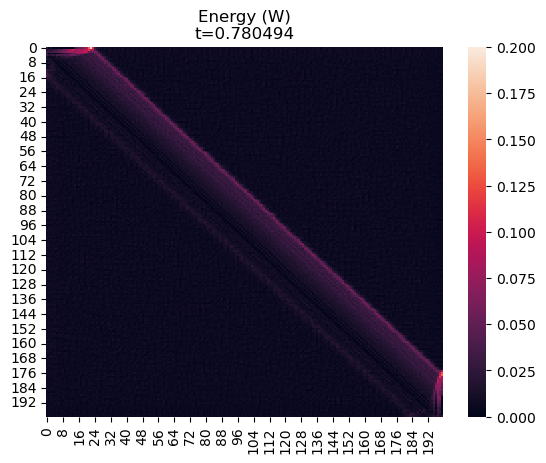

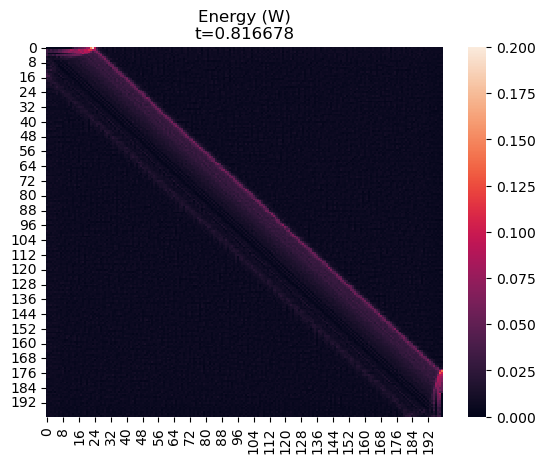

In [16]:
for i in range(n):
    w = np.loadtxt(f'./results/energy{i}.txt', delimiter=',')
    fig, ax = plt.subplots()
    sns.heatmap((w), ax=ax, vmax=0.20)
    ax.set_title(f'Energy (W)\nt={timesteps.loc[i][0]}')
    plt.savefig(f'./graphics/energy_w_{i}.png')

In [17]:
image_dir = './graphics/'
images = list()
for i in range(n):
    file_name = f'energy_w_{i}.png'
    file_path = os.path.join(image_dir, file_name)
    images.append(imageio.imread(file_path))

# Make it pause at the end so that the viewers can ponder
for _ in range(3):
    images.append(imageio.imread(file_path))

imageio.mimsave('./animations/energy_w_evolution.gif', images)

/tmp/ipykernel_10644/760317377.py:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(file_path))
/tmp/ipykernel_10644/760317377.py:10: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(file_path))


### Pressure


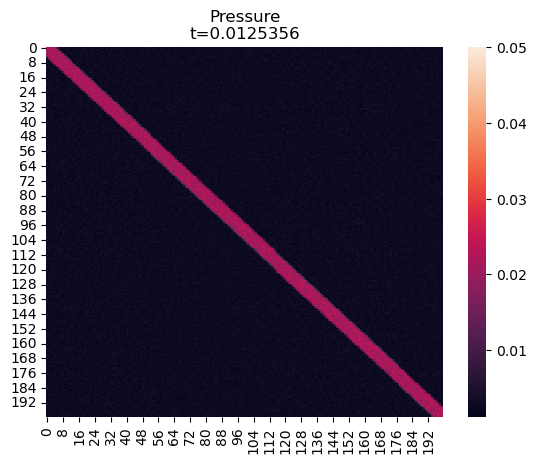

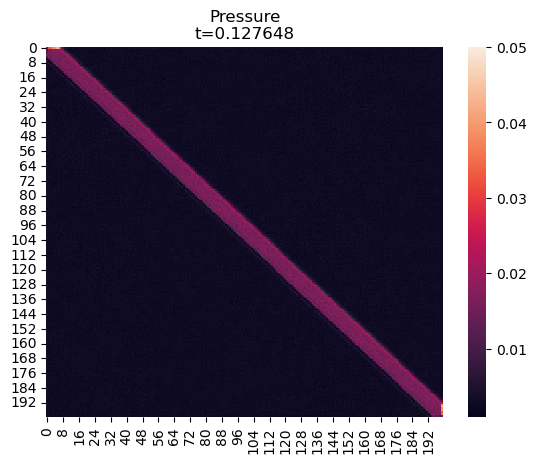

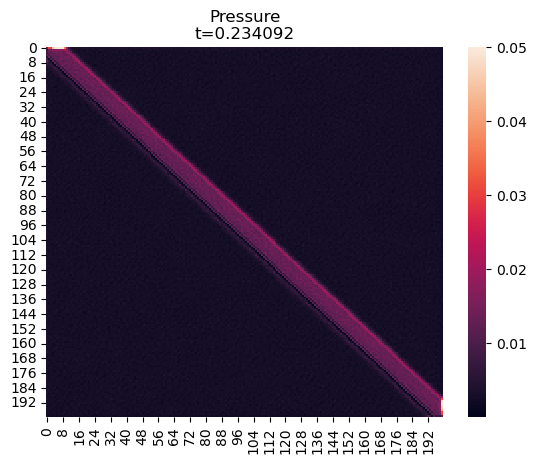

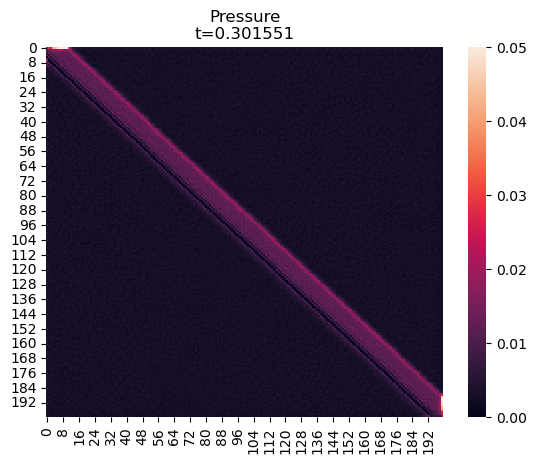

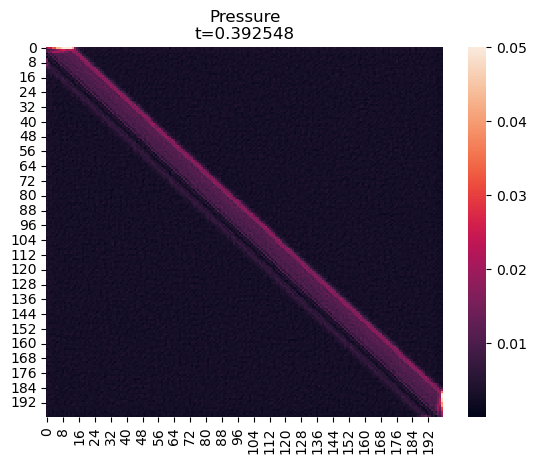

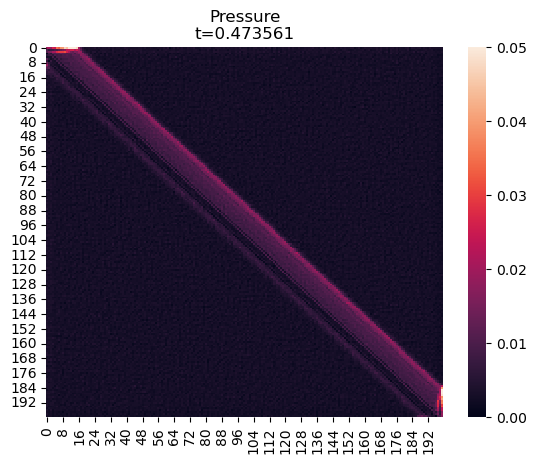

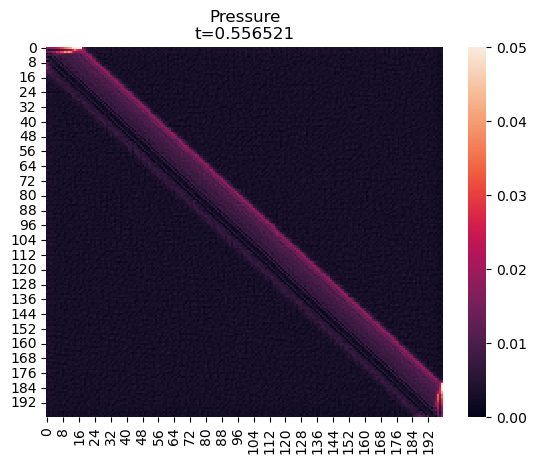

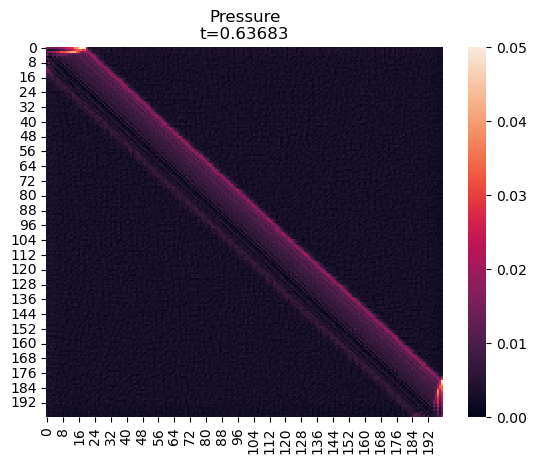

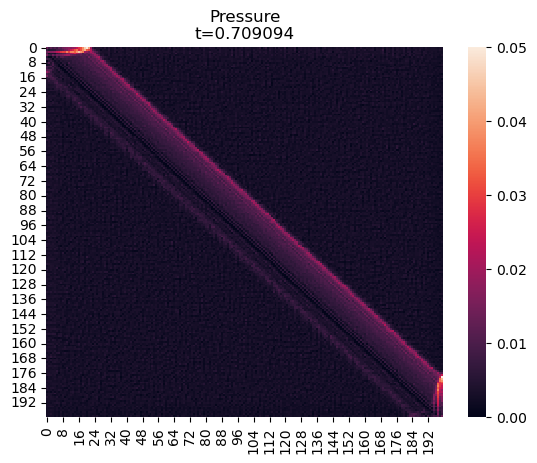

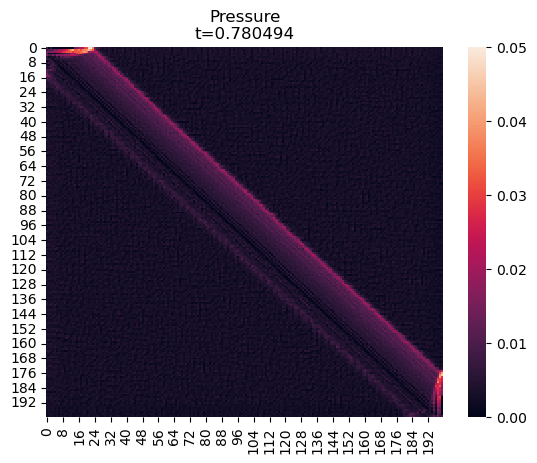

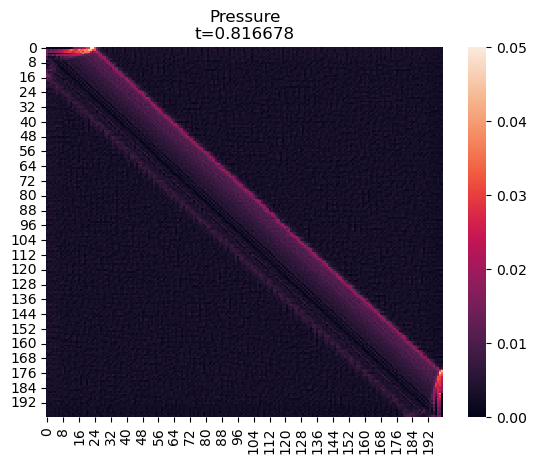

In [18]:
for i in range(n):
    pressure = np.loadtxt(f'./results/pressure{i}.txt', delimiter=',')
    fig, ax = plt.subplots()
    sns.heatmap((pressure), ax=ax, vmax=0.05)
    ax.set_title(f'Pressure\nt={timesteps.loc[i][0]}')
    plt.savefig(f'./graphics/pressure{i}.png')

In [19]:
image_dir = './graphics/'
images = list()
for i in range(n):
    file_name = f'pressure{i}.png'
    file_path = os.path.join(image_dir, file_name)
    images.append(imageio.imread(file_path))

# Make it pause at the end so that the viewers can ponder
for _ in range(3):
    images.append(imageio.imread(file_path))

imageio.mimsave('./animations/pressure.gif', images)

/tmp/ipykernel_10644/3071076919.py:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(file_path))
/tmp/ipykernel_10644/3071076919.py:10: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(file_path))
